In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
!pip install pandas_profiling==2.7.1
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

In [5]:
dataset = fetch_california_housing()

In [7]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
dataset.data.shape, dataset.target.shape

((20640, 8), (20640,))

In [12]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
df['Target'] = dataset.target

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
profile = ProfileReport(df)
profile.to_file("california.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df = df.sample(frac=1)

In [22]:
train, test = train_test_split(df, test_size=0.2)

In [25]:
train.shape, test.shape

((16512, 9), (4128, 9))

In [27]:
xtrain = train.MedInc.values.reshape(-1, 1)
ytrain = train.Target.values
xtest = test.MedInc.values.reshape(-1, 1)
ytest = test.Target.values

In [28]:
xtrain.shape, xtest.shape

((16512, 1), (4128, 1))

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [34]:
lr.coef_, lr.intercept_

(array([0.41925129]), 0.44981069957723485)

In [35]:
yhat_train = lr.predict(xtrain)
yhat_test = lr.predict(xtest)
yhat = lr.predict(df.MedInc.values.reshape(-1, 1))

In [36]:
yhat_train.shape, yhat_test.shape, yhat.shape

((16512,), (4128,), (20640,))

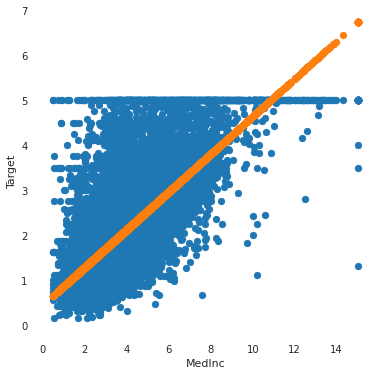

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("MedInc")
ax.set_ylabel("Target")
ax.scatter(xtrain, ytrain)
ax.scatter(xtrain, yhat_train)

In [45]:
np.sqrt(mean_squared_error(ytrain, yhat_train))

0.8381188100942649

In [46]:
np.sqrt(mean_squared_error(ytest, yhat_test))

0.8342635995106045

In [47]:
mean_absolute_error(ytrain, yhat_train), mean_absolute_error(ytest, yhat_test)

(0.6266994988990849, 0.627598822017915)

In [48]:
r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test)

(0.47382301012267125, 0.47139030880752175)